## 2. Unzip data 

In [2]:
import zipfile
from pathlib import Path

zip_path = Path('data.zip')
extract_to = Path('data')

Path(extract_to).mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f'Extracted {zip_path} to {extract_to}')

Extracted data.zip to data


## 3. Configure training

In [3]:
import yaml

classes_txt = Path("data/classes.txt")
output_yaml = Path("data/data.yaml")

with open(classes_txt) as f:
    names = [line.strip() for line in f if line.strip()]

data = {
    "path": "data",
    "train": "train/images",
    "val": "validation/images",
    "nc": len(names),
    "names": names
}

output_yaml.parent.mkdir(parents=True, exist_ok=True)

with open(output_yaml, "w") as f:
    yaml.dump(data, f, sort_keys=False)

print("✅ data.yaml created at data/data.yaml")
print(data)

✅ data.yaml created at data/data.yaml
{'path': 'data', 'train': 'train/images', 'val': 'validation/images', 'nc': 6, 'names': ['OK_NoIssue', 'S1_AxisNotZero', 'S2_UnequalTickSpacing', 'S3_DistortedScaleRange', 'S4_MissingAxisValues', 'S5_MisusedDualAxis']}


# 4.Train model

In [11]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

False
0


In [ ]:

from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="data/data.yaml", epochs=60, imgsz=640, batch=16, device=0) 

Ultralytics 8.3.240  Python-3.12.0 torch-2.9.1+cpu 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: 
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


# 5. Test model 

In [ ]:
from ultralytics import YOLO
from pathlib import Path

CLASS_NAMES = [
    "OK_NoIssue",
    "S1_AxisNotZero",
    "S2_UnequalTickSpacing",
    "S3_DistortedScaleRange",
    "S4_MissingAxisValues",
    "S5_MisusedDualAxis"
]

model = YOLO("runs/detect/train5/weights/best.pt")

results = model.predict(
    source="data/validation/images",
    conf=0.25,
    save=True,
    device="cpu"
)

for r in results:
    image_name = Path(r.path).name

    if r.boxes is None or len(r.boxes) == 0:
        print(f"{image_name}: ❌ No chart detected")
        continue

    cls_id = int(r.boxes.cls[0])
    cls_name = CLASS_NAMES[cls_id]

    if cls_name == "OK_NoIssue":
        compliance = "✅ COMPLIANT"
    else:
        compliance = "❌ NON-COMPLIANT"

    print(f"{image_name}: {cls_name} → {compliance}")


In [ ]:
# from ultralytics import YOLO

# model = YOLO("runs/detect/train5/weights/best.pt")
# results = model.predict(
#     source="data/validation/images",
#     save=True,
#     device='cpu'
# )

# print("Done! Check runs/detect/predict")


image 1/4 c:\Users\ACER\Documents\Proftask\AI sem\Individual\Train YOLO\SchoolProject\data\validation\images\38f7a673-b7d316394613fd7033d363787cb5677a65719a3f_2_462x375.png: 544x640 (no detections), 98.8ms
image 2/4 c:\Users\ACER\Documents\Proftask\AI sem\Individual\Train YOLO\SchoolProject\data\validation\images\691d6be0-rule_34_lines_zero-03.webp: 640x544 (no detections), 77.8ms
image 3/4 c:\Users\ACER\Documents\Proftask\AI sem\Individual\Train YOLO\SchoolProject\data\validation\images\a64a8224-rule_34_lines_zero-11.webp: 640x640 (no detections), 72.4ms
image 4/4 c:\Users\ACER\Documents\Proftask\AI sem\Individual\Train YOLO\SchoolProject\data\validation\images\f8007ff9-60094329-08a74780-974c-11e9-8ee1-e6a97ddc338c.png: 288x640 (no detections), 59.6ms
Speed: 5.3ms preprocess, 77.1ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 640)
Results saved to C:\Users\ACER\Documents\Proftask\AI sem\Individual\Train YOLO\SchoolProject\runs\detect\predict
Done! Check runs/detect/pr

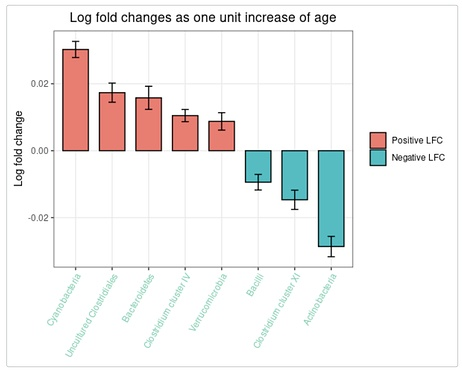

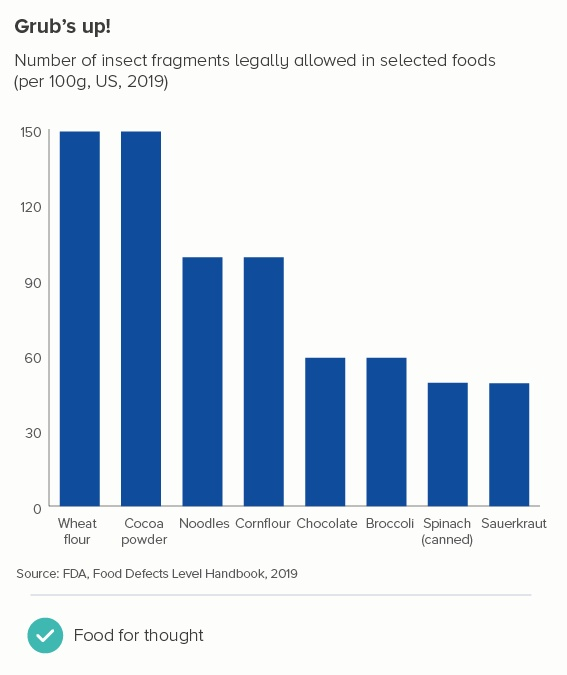

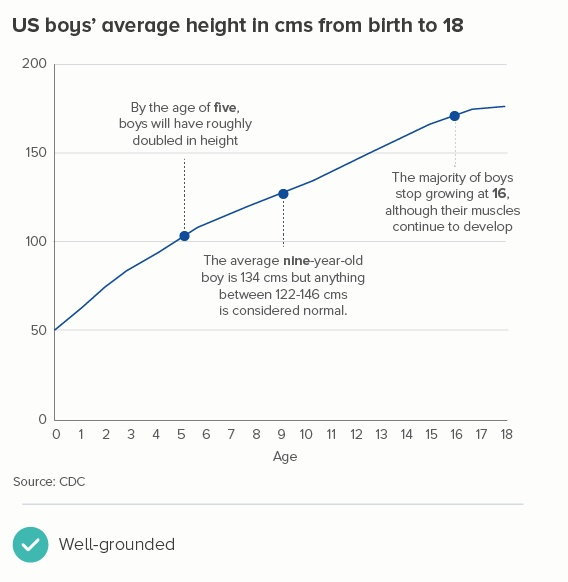

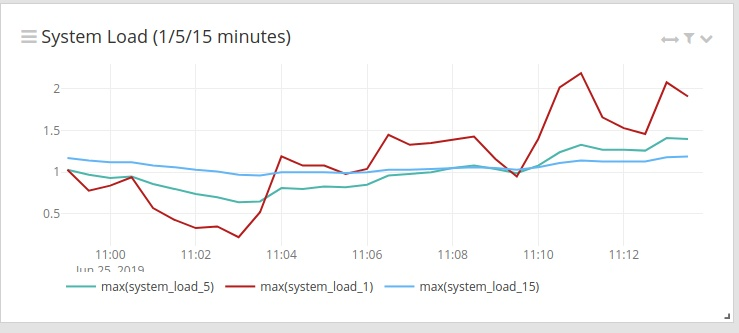

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:20]:
    display(Image(filename=image_path, height=400))
    print('\n')